In [1]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dataset = load_iris()

model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [5]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2])

### tree plot

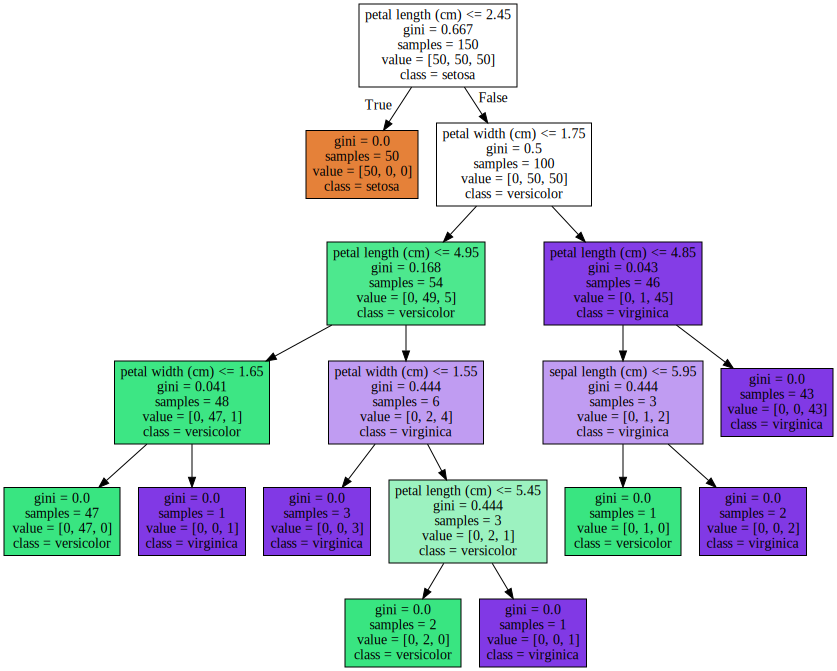

In [10]:
import graphviz
# graphviz software install

from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", feature_names=dataset.feature_names,
                       class_names=['setosa', 'versicolor', 'virginica'], filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(dataset.data, dataset.target)
print(model)

expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


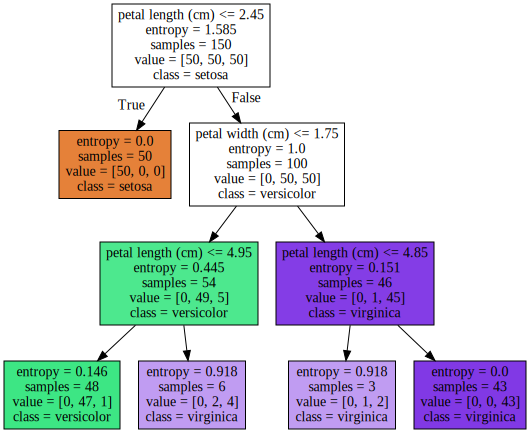

In [12]:
export_graphviz(model, out_file="tree.dot", feature_names=dataset.feature_names,
                       class_names=['setosa', 'versicolor', 'virginica'], filled=True)

with open("tree.dot", 'r') as f:        
        dot_graph = f.read()

graphviz.Source(dot_graph)

### regression

In [13]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import numpy as np

boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

regression_tree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
regression_tree.fit(X,y)
score = np.mean(cross_val_score(regression_tree, X, y, scoring='neg_mean_squared_error', cv=crossvalidation,  n_jobs=1))
print('Mean squared error: %.3f' % score)

Mean squared error: -22.316


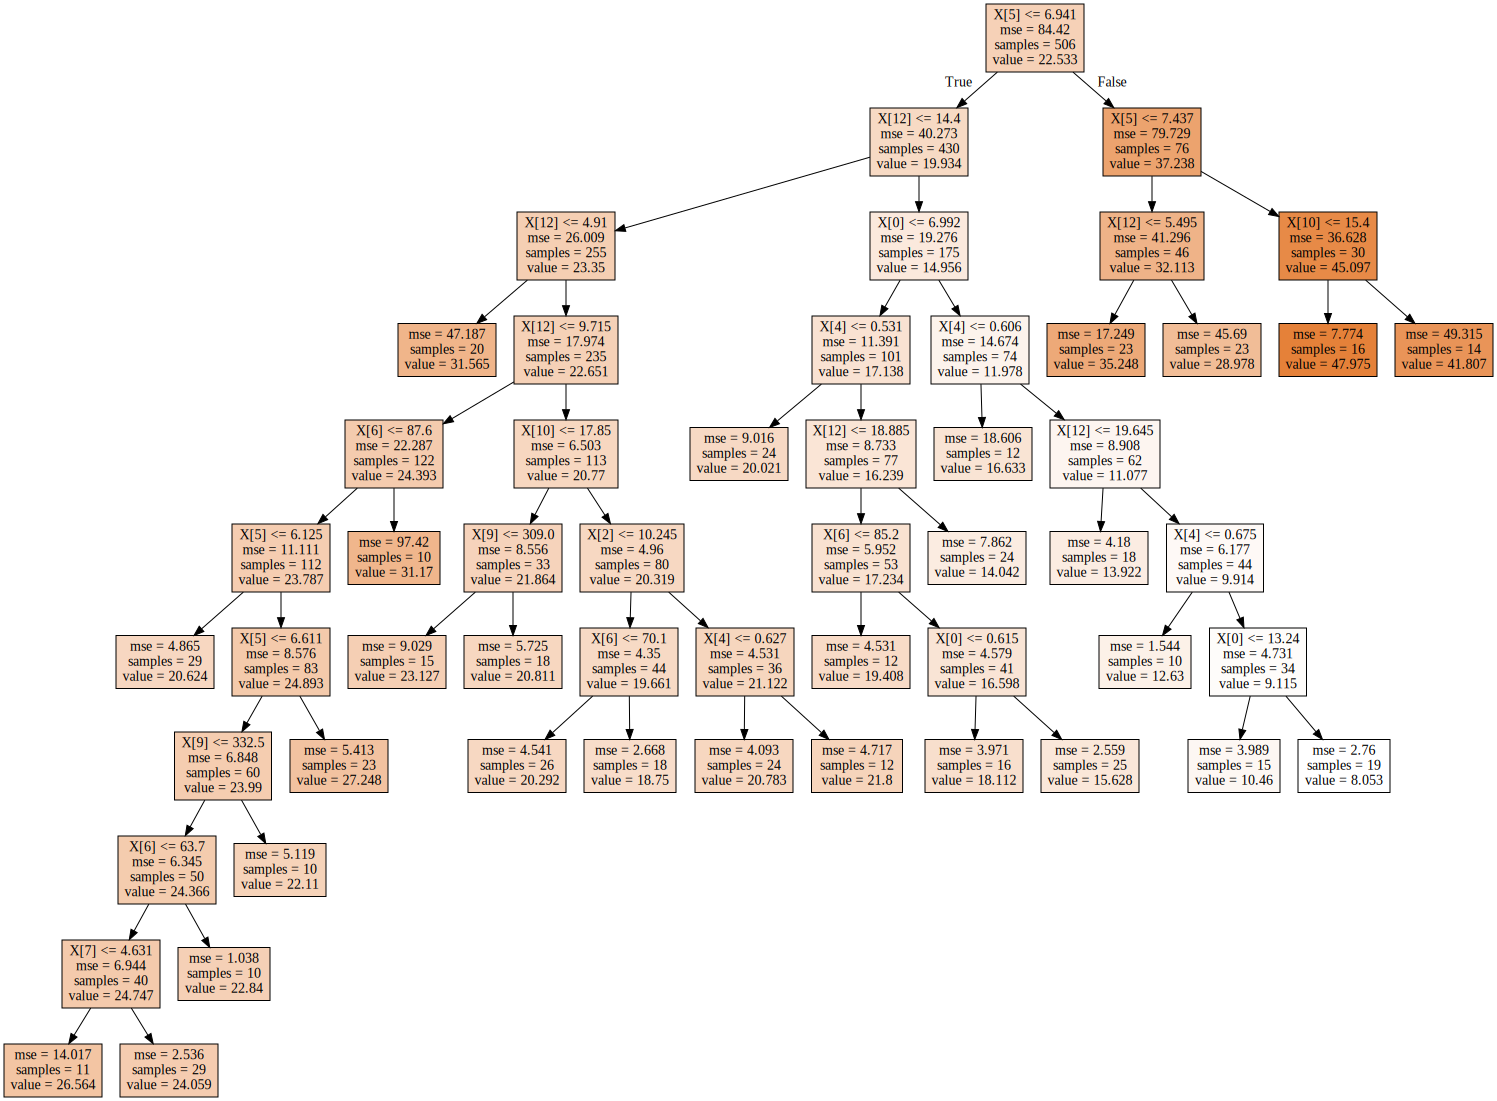

In [16]:
import graphviz
# graphviz software install

export_graphviz(regression_tree, out_file="regression_tree.dot", filled=True)

with open("regression_tree.dot", 'r') as f:        
        dot_graph = f.read()

graphviz.Source(dot_graph)